# Stock Price Prediction For Random Forest

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

## Loading The Data

In [2]:
df =pd.read_csv('tatamo.csv')
df.info()# To Get some information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7418 non-null   object 
 1   Open Price                 7418 non-null   float64
 2   High Price                 7418 non-null   float64
 3   Low Price                  7418 non-null   float64
 4   Close Price                7418 non-null   float64
 5   WAP                        7418 non-null   float64
 6   No.of Shares               7418 non-null   int64  
 7   No. of Trades              7418 non-null   int64  
 8   Total Turnover (Rs.)       7418 non-null   float64
 9   Deliverable Quantity       4792 non-null   float64
 10  % Deli. Qty to Traded Qty  4792 non-null   float64
 11  Spread High-Low            7418 non-null   float64
 12  Spread Close-Open          7418 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

## Data Processing

In [3]:
# Converting the Date column into datetime object of Pandas
df.Date=pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)

In [4]:
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-06-11,346.45,352.90,344.75,350.75,349.506362,1605772,21014,5.612275e+08,336860.0,20.98,8.15,4.30
2021-06-10,345.65,347.85,342.50,344.60,345.174438,1154435,13105,3.984815e+08,202476.0,17.54,5.35,-1.05
2021-06-09,356.50,358.80,339.60,343.25,350.737299,4480912,59698,1.571623e+09,1345349.0,30.02,19.20,-13.25
2021-06-08,346.75,356.50,337.35,352.85,345.857260,3488224,48363,1.206428e+09,1422250.0,40.77,19.15,6.10
2021-06-07,338.55,351.00,338.55,345.50,346.270172,5575585,77740,1.930659e+09,2202934.0,39.51,12.45,6.95


In [5]:
df.tail()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
1991-01-11,170.0,175.0,167.5,175.00,0.0,0,0,0.0,NaN,NaN,7.5,5.00
1991-01-09,177.5,177.5,167.5,171.25,0.0,0,0,0.0,NaN,NaN,10.0,-6.25
1991-01-07,170.0,177.5,167.5,176.25,0.0,0,0,0.0,NaN,NaN,10.0,6.25
1991-01-03,175.0,182.5,175.0,182.50,0.0,0,0,0.0,NaN,NaN,7.5,7.50
1991-01-02,175.0,182.5,175.0,182.50,0.0,0,0,0.0,NaN,NaN,7.5,7.50


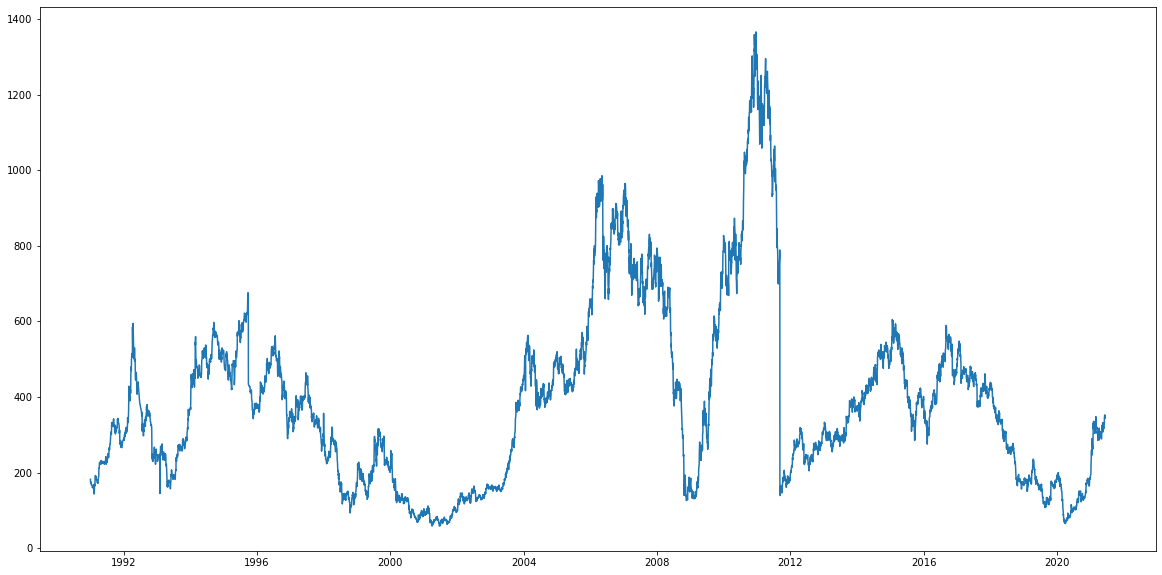

In [6]:
df=df.iloc[::-1]
df['Target']=df['Close Price'].shift(periods=-1)
plt.plot(df.index,df['Target'])

In [7]:
df.shape

(7418, 13)

In [8]:
df_m=df

### Cleaning Data

In [9]:
df_m=df_m.dropna()# To Drop all the rows with NaN values

In [10]:
df_m.shape

(4791, 13)

In [11]:
df.tail()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
2021-06-07,338.55,351.00,338.55,345.50,346.270172,5575585,77740,1.930659e+09,2202934.0,39.51,12.45,6.95,352.85
2021-06-08,346.75,356.50,337.35,352.85,345.857260,3488224,48363,1.206428e+09,1422250.0,40.77,19.15,6.10,343.25
2021-06-09,356.50,358.80,339.60,343.25,350.737299,4480912,59698,1.571623e+09,1345349.0,30.02,19.20,-13.25,344.60
2021-06-10,345.65,347.85,342.50,344.60,345.174438,1154435,13105,3.984815e+08,202476.0,17.54,5.35,-1.05,350.75
2021-06-11,346.45,352.90,344.75,350.75,349.506362,1605772,21014,5.612275e+08,336860.0,20.98,8.15,4.30,NaN


## Splitting the Data

In [12]:
# 30% of the dataset is taken as the test dataset
x_train,x_test,y_train,y_test=train_test_split(df_m.drop(['Target'],axis='columns'),df_m['Target'],test_size=0.3)

## Training the Model

In [13]:
model=RandomForestRegressor(n_estimators=500)

In [14]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

### Accuracy

In [15]:
model.score(x_test,y_test)

0.997533371699332

In [16]:
df.tail(10)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
2021-05-31,319.40,319.50,312.10,318.70,316.437382,2185714,29241,6.916416e+08,586127.0,26.82,7.40,-0.70,318.10
2021-06-01,319.65,325.70,317.40,318.10,320.652831,1479190,15161,4.743065e+08,218106.0,14.74,8.30,-1.55,323.00
2021-06-02,316.20,324.25,315.50,323.00,321.131989,2196974,27530,7.055186e+08,1043750.0,47.51,8.75,6.80,325.45
2021-06-03,324.15,327.50,323.65,325.45,325.867980,2157151,27066,7.029464e+08,970169.0,44.97,3.85,1.30,334.95
2021-06-04,325.45,336.90,324.50,334.95,329.707336,1897098,17556,6.254871e+08,552896.0,29.14,12.40,9.50,345.50
2021-06-07,338.55,351.00,338.55,345.50,346.270172,5575585,77740,1.930659e+09,2202934.0,39.51,12.45,6.95,352.85
2021-06-08,346.75,356.50,337.35,352.85,345.857260,3488224,48363,1.206428e+09,1422250.0,40.77,19.15,6.10,343.25
2021-06-09,356.50,358.80,339.60,343.25,350.737299,4480912,59698,1.571623e+09,1345349.0,30.02,19.20,-13.25,344.60
2021-06-10,345.65,347.85,342.50,344.60,345.174438,1154435,13105,3.984815e+08,202476.0,17.54,5.35,-1.05,350.75


In [17]:
pred_y=model.predict(x_test)

## Evaluvation And Visualisation

In [18]:
#Root Mean Sqaured Error
mean_squared_error(y_test,pred_y,squared=False)

13.59720460995638

In [19]:
#Squared Error
mean_squared_error(y_test,pred_y)

184.88397320501903

In [20]:
# Mean_Absolute Error
mean_absolute_error(y_test,pred_y)

9.094707510431135

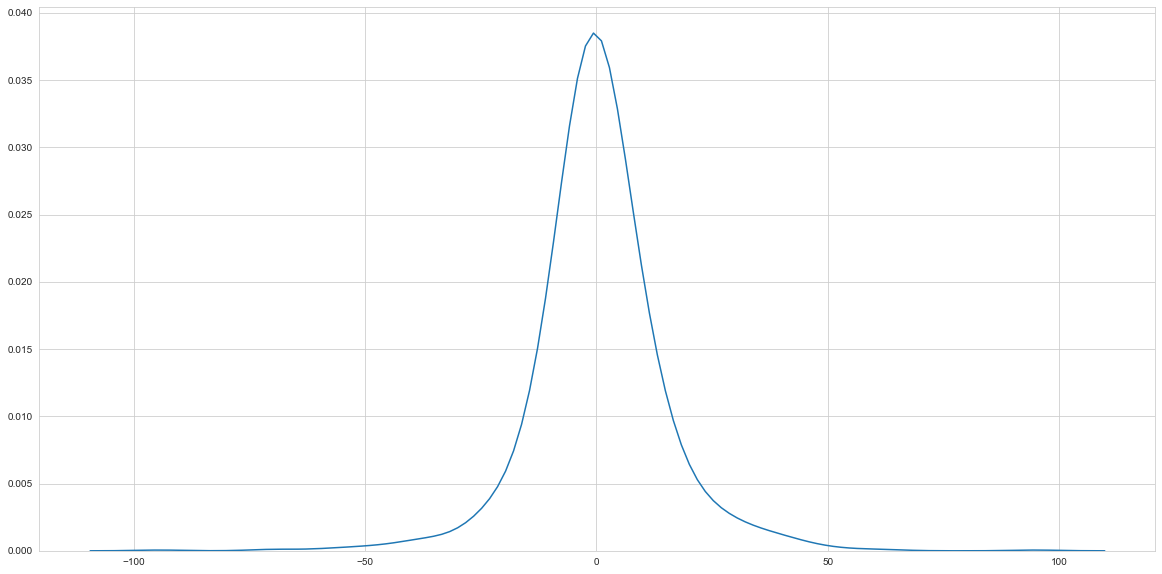

In [21]:
delta_y = y_test-pred_y;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=5)
plt.show()

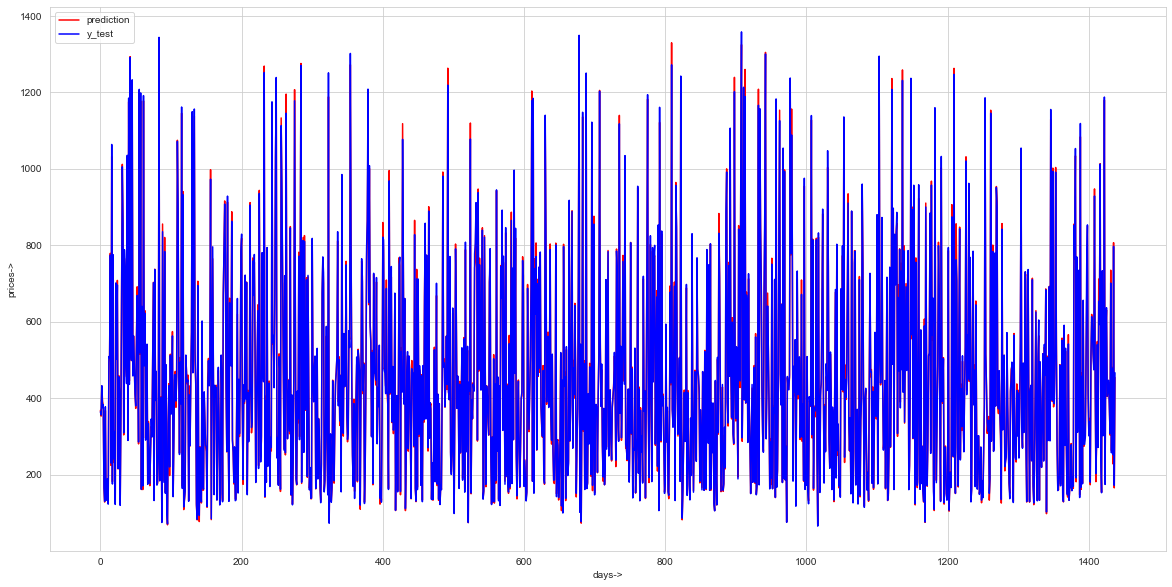

In [22]:
plt.plot(pred_y,color='red', label='prediction')
plt.plot(list(y_test),color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.legend(loc='upper left')
plt.show()

<BarContainer object of 2 artists>

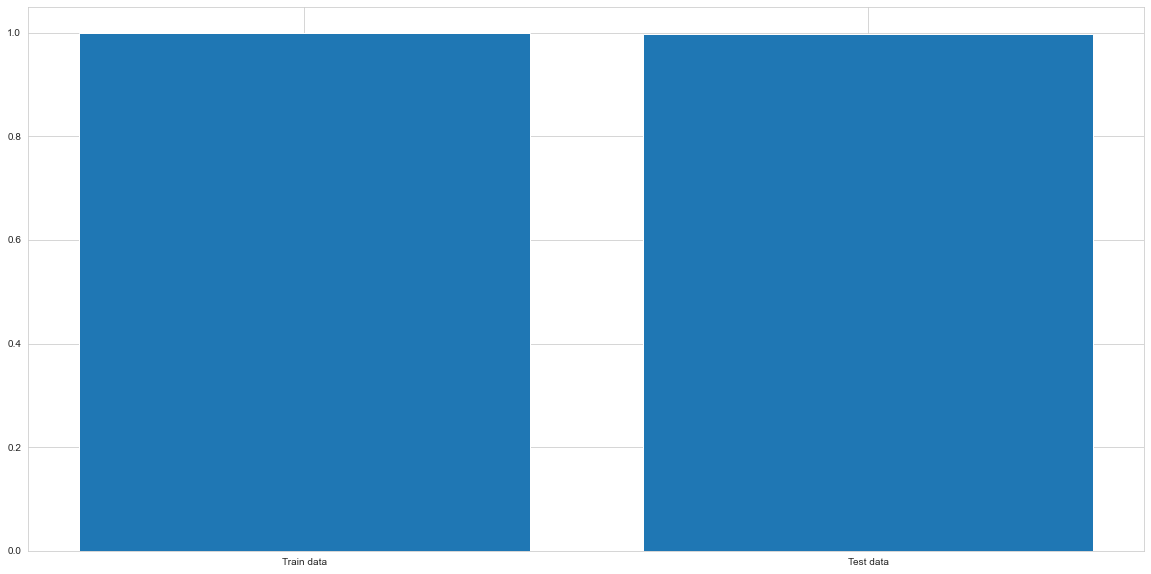

In [23]:
s_train=model.score(x_train,y_train)
s_test=model.score(x_test,y_test)
train_e=mean_squared_error(y_train,model.predict(x_train),squared=False)
test_e=mean_squared_error(y_test,pred_y,squared=False)
plt.bar(('Train data','Test data'),(s_train,s_test))

In [24]:
#Real Time Prediction
model.predict([[2205.90,2241.80,2184.60,2227.30,2215.96,615525,36724,1363979932,233667,37.96,57.20,21.40]])

array([1337.8153])